The idea of this notebook is to do the preprocessing of the penguin dataset with 3 different libraries: Scikit-Learn, Tensorflow and pytorch.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [2]:
df=pd.read_csv("../data/penguins_lter.csv")

In [3]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [5]:
df.shape

(344, 17)

In [6]:
df.Species.value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [7]:
df.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [8]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [9]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Droping colums comments, Delta 15N and Delta 13C. None of them are useful for training a model. 

In [10]:
df=df.drop('Comments', axis=1)
df=df.drop('Delta 15 N (o/oo)',axis=1)
df=df.drop('Delta 13 C (o/oo)',axis=1)
df=df.drop('Individual ID',axis=1)
df=df.drop('Date Egg',axis=1)
df=df.drop('studyName',axis=1)

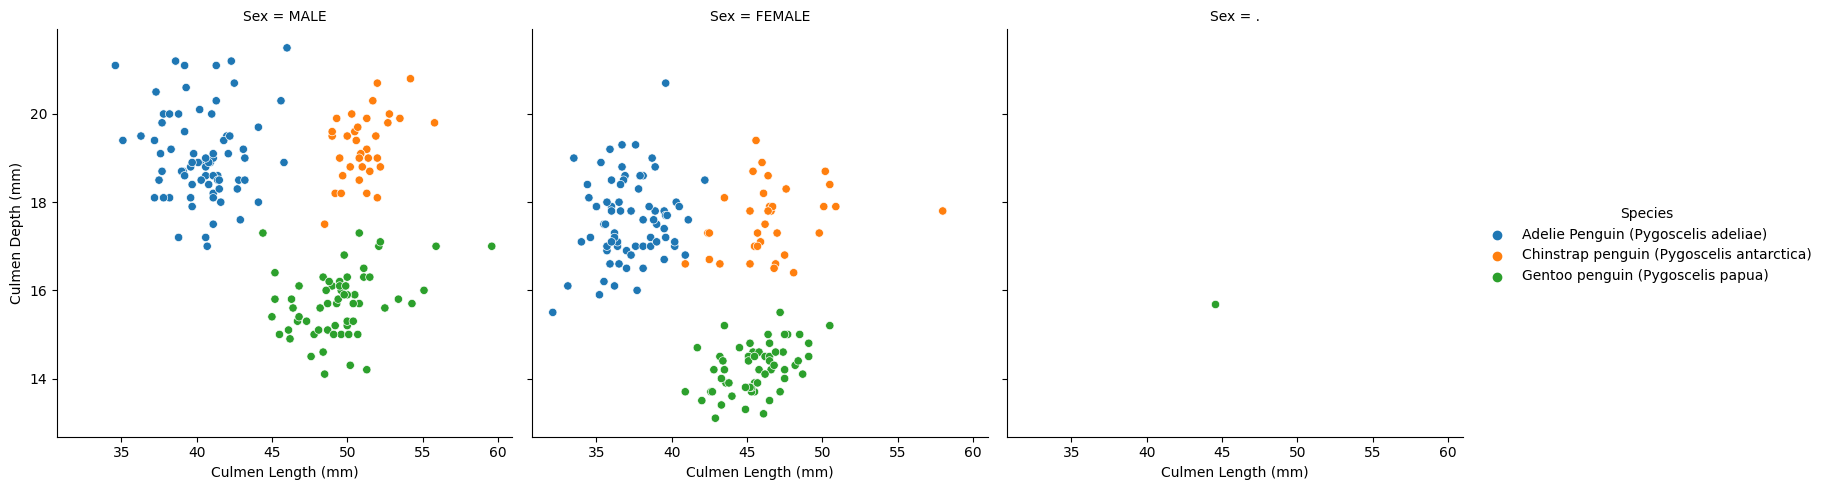

In [11]:
sns.relplot(
    data=df,
    x="Culmen Length (mm)", y="Culmen Depth (mm)", col="Sex", hue="Species"
)

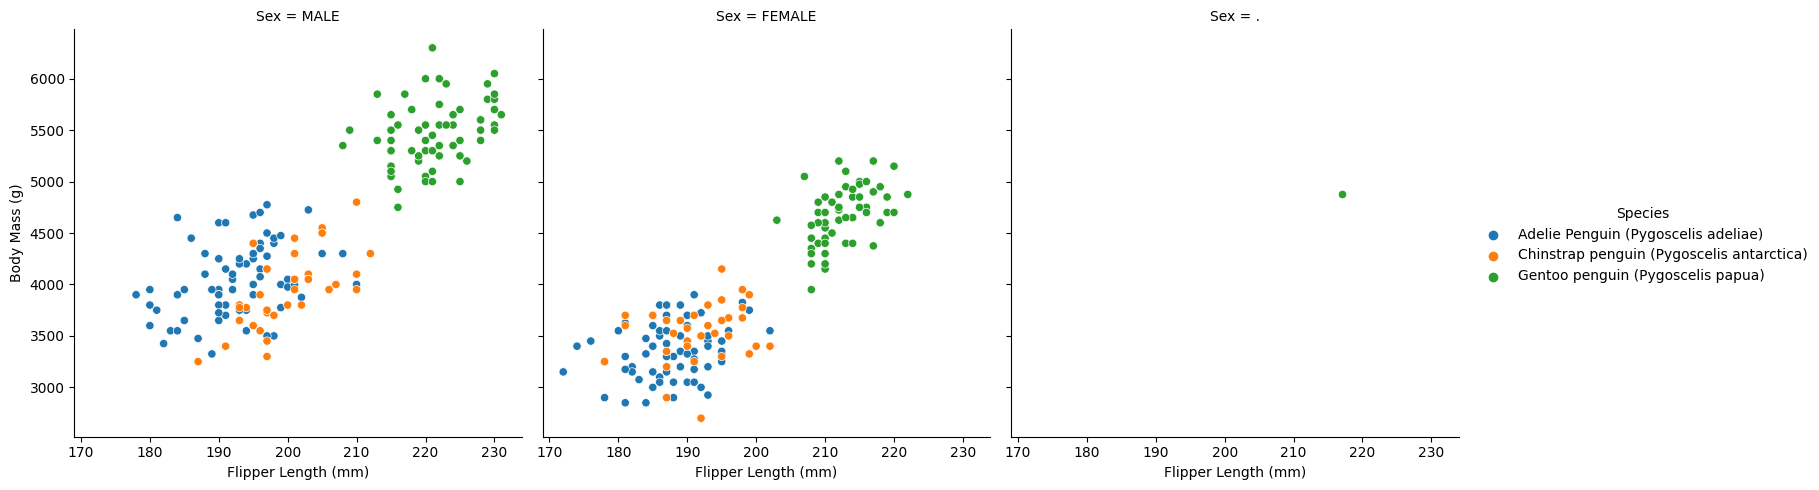

In [12]:
sns.relplot(
    data=df,
    x="Flipper Length (mm)", y="Body Mass (g)", col="Sex", hue="Species"
)

<Axes: xlabel='Island', ylabel='Body Mass (g)'>

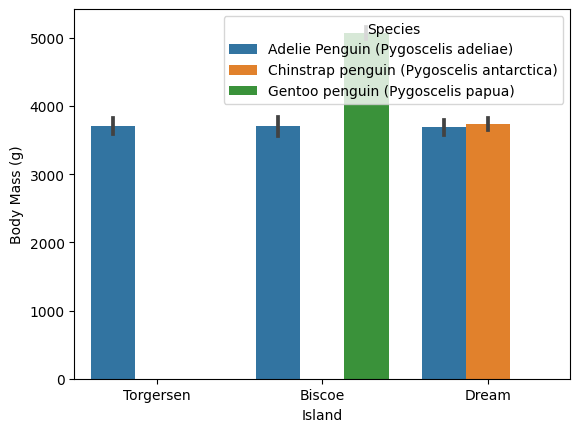

In [13]:
sns.barplot(data=df,  x="Island", y="Body Mass (g)", hue="Species")

<Axes: xlabel='Region', ylabel='Body Mass (g)'>

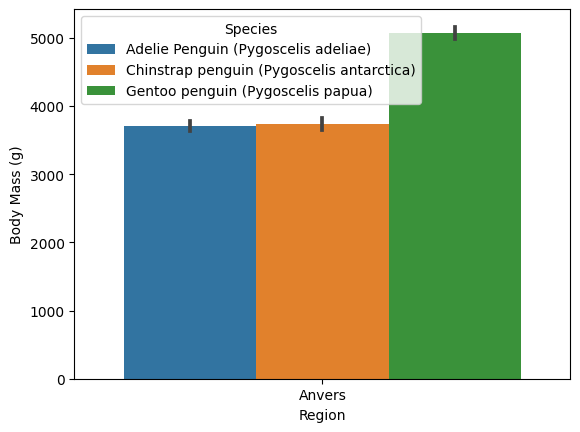

In [14]:
sns.barplot(data=df,  x="Region", y="Body Mass (g)", hue="Species")

In [15]:
df["Stage"].value_counts()

Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64

Since Region and Stage is only one value we are going to drop it as well as the sample number

In [16]:
df=df.drop("Region",axis=1)
df=df.drop('Sample Number',axis=1)
df=df.drop('Stage',axis=1)

Preprocessing on Scikit-Learn

Steps:
1. Deal with null values
2. Convert species to a numerical value
3. Convert other categorical values
3. Define the pipeline

In [17]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [26]:
df_train = df[['Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)']]
X=df_train.copy()
le = LabelEncoder()
y= le.fit_transform(df['Species'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = list(set(X_train.columns) - set(numeric_features))

Pipeline

In [27]:
numeric_process = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.NaN, strategy='median')),
                                          ('scaler', StandardScaler())])
categorical_process = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing_pipeline = ColumnTransformer(transformers=[('num', numeric_process, numeric_features),
                                                                 ('cat', categorical_process, categorical_features)],
                                                   remainder='drop')

In [28]:
preprocessing_pipeline.fit_transform(X_train)

array([[-1.51801278, -0.43762006, -0.43245586],
       [ 0.5390362 , -0.84265336,  0.97162162],
       [-0.84446577,  1.28377144, -0.43245586],
       [-0.66242604,  0.01804239, -0.57286361],
       [ 0.95772758, -1.04517001,  1.88427198],
       [ 1.26719513,  0.11930072,  1.88427198],
       [ 1.57666268, -0.74139504,  1.39284486],
       [-1.39058497, -0.48824923, -0.99408686],
       [-1.31776908,  0.6762215 , -1.20469848],
       [-1.39058497,  0.11930072, -0.99408686],
       [ 0.02932495, -1.75397827,  0.4801945 ],
       [-1.48160484, -0.08321593, -1.1344946 ],
       [-0.06169492, -0.94391168,  0.83121387],
       [ 0.88491169, -0.99454084,  1.46304873],
       [-1.28136113,  0.72685066, -0.57286361],
       [ 0.77568785, -0.33636174, -0.15164037],
       [ 0.48442428,  0.42307569, -0.64306749],
       [-0.24373465,  1.84069222, -0.29204812],
       [-0.91728167,  0.06867155, -1.48551397],
       [ 0.42981236, -1.29831582,  0.55039837],
       [-0.88087372,  0.82810898, -1.134

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestClassifier(max_depth=4)

In [39]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessing_pipeline),
    ('model', rf_model),
])

In [40]:
rf_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', RandomForestClassifier(max_depth=4))])

In [41]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
66,35.5,16.2,195.0
229,46.8,15.4,215.0
7,39.2,19.6,195.0
140,40.2,17.1,193.0
323,49.1,15.0,228.0
...,...,...,...
188,47.6,18.3,195.0
71,39.7,18.4,190.0
106,38.6,17.2,199.0
270,46.6,14.2,210.0


In [42]:
_ = rf_pipeline.fit(X_train, y_train)

In [43]:
preds = rf_pipeline.predict(X_test)
preds

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       1, 0, 0])

In [44]:
mean_absolute_error(y_test, preds)

0.043478260869565216

In [46]:
from sklearn.model_selection import GridSearchCV

param_dict = {'model__max_depth': np.arange(1, 10, 1)}

search = GridSearchCV(rf_pipeline, param_dict,  scoring='neg_mean_absolute_error')

_ = search.fit(X_train, y_train)

In [37]:
search.best_params_

{'model__max_depth': 4}

In [60]:
import pickle

# Assuming you have a trained model named 'model'
# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_pipeline, file)

In [61]:
with open("model.pkl", "rb") as file:
    load_model= pickle.load(file)


In [62]:
load_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', RandomForestClassifier(max_depth=4))])

Pytorch loading

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import time

In [24]:
import pandas as pd
import torch
import random

# creating dummy targets (float values)
targets_data = [random.random() for i in range(10)]
targets_data


[0.11118977876191705,
 0.3194396178716179,
 0.8060368646426694,
 0.04333679104633814,
 0.16775501493954048,
 0.17820799930384257,
 0.8772734706667551,
 0.9238661812701299,
 0.8188129916465159,
 0.007711405935823201]

In [25]:
class PenguinDataset(Dataset):
    def __init__(self, labels = None, attributes= None):
        self.labels = torch.tensor(labels)
        self.attributes = torch.tensor(attributes)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.attributes[idx]
        sample = {"Text": text, "Class": label}
        return sample
    





In [26]:
start_time = time.time()
df_pytorch=PenguinDataset(X_train, y)
loader= DataLoader(df_pytorch, batch_size=10, shuffle=True, num_workers= 0, pin_memory= False, drop_last=True)

for (idx, batch) in enumerate(df_pytorch):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')

print ("My program took", time.time() - start_time, "to run")

0 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

0 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  1.0000,  0.0000], dtype=torch.float64)} 

1 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  1.0000,  0.0000], dtype=torch.float64)} 

2 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-0.8445,  1.2838, -0.4325,  0.5898,  0.0000,  0.0000,  1.0000,  1.0000,
         0.0

In [27]:
start_time = time.time()
df_pytorch=PenguinDataset(X_train, y)
loader= DataLoader(df_pytorch, batch_size=10, shuffle=True, num_workers= 3, pin_memory= True, drop_last=True)

for (idx, batch) in enumerate(df_pytorch):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')

print ("My program took", time.time() - start_time, "to run")

0 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

0 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  1.0000,  0.0000], dtype=torch.float64)} 

1 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  1.0000,  0.0000], dtype=torch.float64)} 

2 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-0.8445,  1.2838, -0.4325,  0.5898,  0.0000,  0.0000,  1.0000,  1.0000,
         0.0

In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow'

In [29]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'